In [1]:
import numpy as np
import scipy.special
import math

---

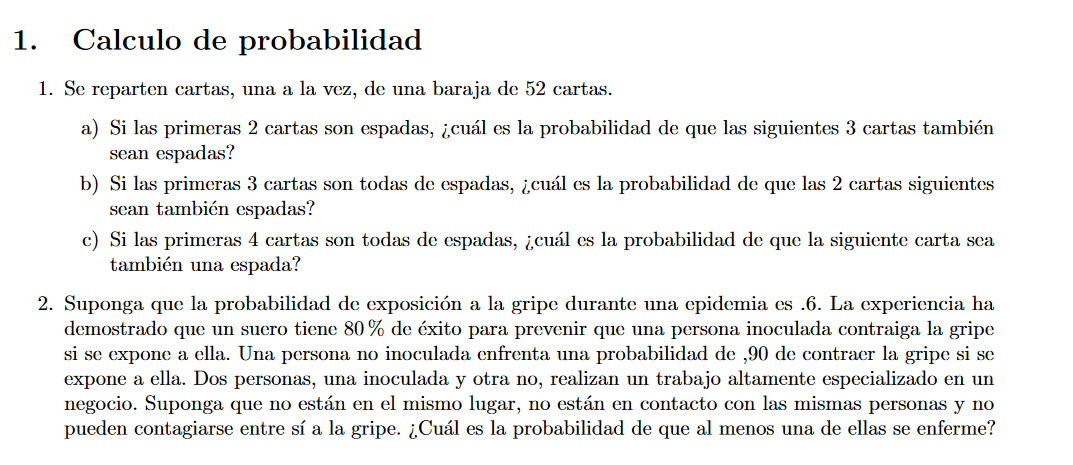

### **Respuesta teorica:**

Se tienen 13 cartas de espadas.

a)

In [2]:
(11/50)*(10/49)*(9/48)

0.008418367346938776

b)

In [3]:
(10/49)*(9/48)

0.03826530612244898

c) 

In [4]:
9/48

0.1875

### **Respuesta computacional**

In [13]:
def crear_baraja():
    '''crea una baraja donde las espadas se distinguen con 1, y el resto con 0'''
    cartas = np.array([])
    cartas = np.append(cartas,np.repeat(1,13))
    cartas = np.append(cartas,np.repeat(0,52-13))
    return cartas

## a)

A: Las primeras 2 cartas son espadas

B: Las siguientes 3 cartas son espadas

In [55]:
N = 1000000
A_ocurrio = 0
A_B_ocurrio = 0

for i in range(N):
    cartas = crear_baraja()
    np.random.shuffle(cartas)
    if (sum(cartas[0:2]) ==2):
        A_ocurrio +=1
    
    if ((sum(cartas[0:2]) ==2 ) & (sum(cartas[2:5])==3)):
        A_B_ocurrio +=1
        

$P(B|A) = P(A \cap B)/P(A)$

In [59]:
A_B_ocurrio/A_ocurrio

0.008621421176790049

## b)

In [60]:
N = 1000000
A_ocurrio = 0
A_B_ocurrio = 0

for i in range(N):
    cartas = crear_baraja()
    np.random.shuffle(cartas)
    if (sum(cartas[0:3]) ==3):
        A_ocurrio +=1
    
    if ((sum(cartas[0:3]) ==3 ) & (sum(cartas[3:5])==2)):
        A_B_ocurrio +=1

In [61]:
A_B_ocurrio/A_ocurrio

0.0386515092120737

## c)

In [64]:
N = 1000000
A_ocurrio = 0
A_B_ocurrio = 0

for i in range(N):
    cartas = crear_baraja()
    np.random.shuffle(cartas)
    if (sum(cartas[0:4]) ==4):
        A_ocurrio +=1
    
    if ((sum(cartas[0:4]) ==4 ) & (sum(cartas[4:5])==1)):
        A_B_ocurrio +=1

In [65]:
A_B_ocurrio/A_ocurrio

0.18826309570697125

---